# <font color='#eb3483'> COMPAS Analysis </font>


Our group analyzed the COMPAS Dataset to understand criminal recidivism more clearly.

We hypothesized that a machine learning analysis of the COMPAS Two-Year Excel Spreadsheets would describe a higher likelihood of African-American surveyors 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set(rc={'figure.figsize':(6,5)}) 
%matplotlib inline

## <font color='#eb3483'> Introduction </font>

The data, released by ProPublica, is based off of surveys filled by defendants when booked in jail, which is used by COMPAS to predict the likelihood of recidivism within the two years after release.

### <font color='#eb3483'> Understanding the Initial Dataset </font>

In [3]:
df = pd.read_csv('compas-analysis-master/compas-scores-two-years.csv')

In [4]:
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [5]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [6]:
df.dtypes

id                           int64
name                        object
first                       object
last                        object
compas_screening_date       object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number               object
c_offense_date              object
c_arrest_date               object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_case_number               object
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date      

### <font color='#eb3483'> Removing rows based on context </font>
Similar to ProPublica, we assume that is a COMPAS scored crime was not within 30 days from when the person was arrested, the offense recorded is not necessarily what was used in the prediction. Therefore, we won't be using such cases. Additionally, people charged with traffic offences (c_charge_degree of "O") will not be considered.

In [7]:
df = df[
    (df.days_b_screening_arrest <= 30) &
    (df.days_b_screening_arrest >= -30) &
    (df.c_charge_degree != 'O')
]

### <font color='#eb3483'> Removing duplicate rows </font>
Fortunately, no duplicate rows were found.

In [8]:
print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)

(6172, 53)
(0, 53)


### <font color='#eb3483'> Removing columns with too much missing data </font>
Columns that had missing fields of data, such that removing the row rather than the column would lead to a greater loss in usable data, were removed. Fortunately, most of these columns are mostly irrelevant to our predictions, e.g., case numbers

In [9]:
df.isna().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest       0
c_jail_in                     0
c_jail_out                    0
c_case_number                 0
c_offense_date              784
c_arrest_date              5388
c_days_from_compas            0
c_charge_degree               0
c_charge_desc                 5
is_recid                      0
r_case_number              3182
r_charge_degree            3182
r_days_from_arrest         4175
r_offense_date             3182
r_charge_desc              3228
r_jail_in                  4175
r_jail_o

In [10]:
drop_columns_na = [
    "c_offense_date",
    "c_arrest_date",
    "r_case_number",
    "r_charge_degree",
    "r_days_from_arrest",
    "r_offense_date",
    "r_charge_desc",
    "r_jail_in",
    "r_jail_out",
    "violent_recid",
    "vr_case_number",
    "vr_charge_degree",
    "vr_offense_date",
    "vr_charge_desc"]
df = df.drop(columns=drop_columns_na)

### <font color='#eb3483'> Removing irrelevant columns </font>
E.g., names, ids, dob (since age is also given) if they aren't removed by the previous step

In [11]:
drop_columns_irrel = [
    "id",
    "name",
    "first",
    "last",
    "compas_screening_date",
    "dob",
    "age_cat",
    "days_b_screening_arrest",
    "c_jail_in",
    "c_jail_out",
    "c_case_number",
    "c_days_from_compas",
    "c_charge_desc",
    "type_of_assessment",
    "screening_date",
    "v_type_of_assessment",
    "v_decile_score",
    "v_score_text",
    "v_screening_date",
    "in_custody",
    "out_custody",
    "score_text",
    "start",
    "end",
    "event",
    "decile_score.1",
    "priors_count.1"
]
df = df.drop(columns=drop_columns_irrel)

## <font color='#eb3483'> Understanding The Top Offenders </font>

In [12]:
top_reoffenders = df.sort_values(by ='priors_count', ascending=False).head()
top_reoffenders

,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,is_violent_recid,two_year_recid
6825,Male,45,African-American,0,8,0,0,38,F,1,1,1
2186,Male,38,African-American,0,7,5,0,37,M,1,1,1
328,Male,53,Caucasian,0,6,0,0,36,F,1,0,1
2441,Male,55,Caucasian,0,9,0,0,33,F,1,0,1
503,Male,66,African-American,0,6,0,0,33,F,1,0,1


In [13]:
def find_min_max_in(col):
    top = df[col].idxmax()
    top_df = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bottom_df = pd.DataFrame(df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('priors_count')

,6825,0
sex,Male,Male
age,45,69
race,African-American,Other
juv_fel_count,0,0
decile_score,8,1
juv_misd_count,0,0
juv_other_count,0,0
priors_count,38,0
c_charge_degree,F,F
is_recid,1,0


## <font color='#eb3483'> Summary Statistics </font>

In [14]:
df.describe()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,two_year_recid
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,34.534511,0.059300,4.418503,0.091218,0.110661,3.246436,0.484446,0.112119,0.455120
std,11.730938,0.463599,2.839463,0.497872,0.470731,4.743770,0.499799,0.315539,0.498022
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,42.000000,0.000000,7.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,96.000000,20.000000,10.000000,13.000000,9.000000,38.000000,1.000000,1.000000,1.000000


### <font color='#eb3483'> Distribution of COMPAS scores for different races </font>

In [15]:
race_frequency = df.groupby(df.race).size()
print(race_frequency)

race
African-American    3175
Asian                 31
Caucasian           2103
Hispanic             509
Native American       11
Other                343
dtype: int64


In [16]:
compas_pred_hist = df[["race", "decile_score", "two_year_recid"]]
compas_pred_hist["compas_acc"] = compas_pred_hist["decile_score"] - compas_pred_hist["two_year_recid"]

**African-Americans vs Caucasians**

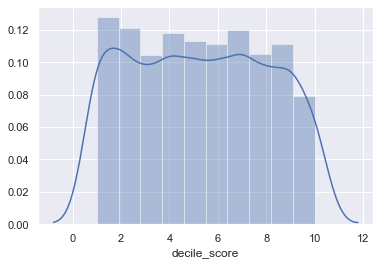

In [17]:
sns.distplot(compas_pred_hist[compas_pred_hist.race=="African-American"].decile_score, bins=10)

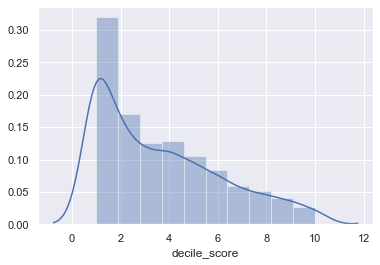

In [18]:
sns.distplot(compas_pred_hist[compas_pred_hist.race=="Caucasian"].decile_score, bins=10)

## <font color='#eb3483'> Examaining Bias in COMPAS Predictions </font>

### <font color='#eb3483'> One-Hot Encoding of Data </font>

In [19]:
to_code = ["sex", "race", "c_charge_degree"]
df = pd.merge(df, pd.get_dummies(data=df[to_code], columns=to_code), left_index=True, right_index=True)

### <font color='#eb3483'> Linear Regression against COMPAS scores </font>

In [20]:
compas_pred = "decile_score"
target = "two_year_recid"
independent_variables = df.drop(columns=[compas_pred, target]).select_dtypes(exclude=['object']).columns

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X=df[independent_variables], y=df[compas_pred])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
import statsmodels.api as sm
from scipy import stats

X = df[independent_variables]
y = df[compas_pred]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

**Correlation between race and higher COMPAS score**

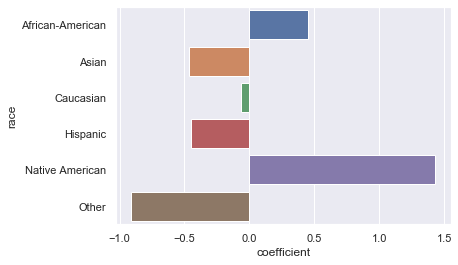

In [73]:
races = [race[5:] for race in independent_variables[9:15]]
race_data = pd.DataFrame(data={"race": races, "coefficient": lin_reg.coef_[9:15]})
race_data["p value"] = est2.pvalues[10:16].values
race_data["p less than 0.05"] = race_data["p value"] <= 0.05
sns.barplot(x=race_data.coefficient, y=race_data.race)

In [74]:
race_data

,race,coefficient,p value,p less than 0.05
0,African-American,0.454732,5.107765e-15,True
1,Asian,-0.465719,9.569674e-01,False
2,Caucasian,-0.060973,5.256301e-04,True
3,Hispanic,-0.448465,7.995156e-01,False
4,Native American,1.432914,3.457923e-04,True
5,Other,-0.912489,3.893632e-03,True


**Correlation between sex and higher COMPAS score**

In [24]:
independent_variables

Index(['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'is_recid', 'is_violent_recid', 'sex_Female',
       'sex_Male', 'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other',
       'c_charge_degree_F', 'c_charge_degree_M'],
      dtype='object')

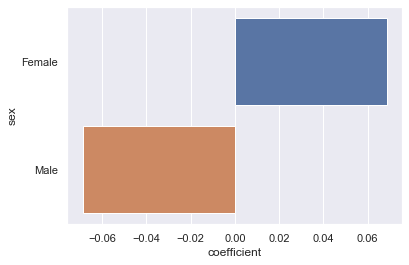

In [25]:
sexes = [sex[4:] for sex in independent_variables[7:9]]
sex_data = pd.DataFrame(data={"sex": sexes, "coefficient": lin_reg.coef_[7:9]})
sns.barplot(x=sex_data.coefficient, y=sex_data.sex)

## <font color='#eb3483'> Logistical Regression </font>

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [185]:
compas = df

In [186]:
compas.head()

,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,...,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,c_charge_degree_F,c_charge_degree_M
0,Male,69,Other,0,1,0,0,0,F,0,...,0,1,0,0,0,0,0,1,1,0
1,Male,34,African-American,0,3,0,0,0,F,1,...,0,1,1,0,0,0,0,0,1,0
2,Male,24,African-American,0,4,0,1,4,F,1,...,0,1,1,0,0,0,0,0,1,0
5,Male,44,Other,0,1,0,0,0,M,0,...,0,1,0,0,0,0,0,1,0,1
6,Male,41,Caucasian,0,6,0,0,14,F,1,...,0,1,0,0,1,0,0,0,1,0


In [187]:
independent_variables

Index(['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'is_recid', 'is_violent_recid', 'sex_Female',
       'sex_Male', 'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other',
       'c_charge_degree_F', 'c_charge_degree_M'],
      dtype='object')

In [188]:
columns = independent_variables

In [205]:
from ipywidgets import interact, fixed

#Create our plotting function
def plotRecidivismPercent(compas, col):
    #Check out what average recidivism is for each potential value in a column
    compas.groupby(col).agg({'two_year_recid':np.mean}).plot.barh()

#Let's look at all columns (you might want to drop numeric columns 
#that aren't binary but you can also just ignore that graph)
columns_to_plot = compas.drop('two_year_recid',axis=1).columns
interact(plotRecidivismPercent, 
         col=columns_to_plot, compas=fixed(compas));

interactive(children=(Dropdown(description='col', options=('sex', 'age', 'race', 'juv_fel_count', 'decile_scor…

In [215]:
#Get our data into the right format
X = df[independent_variables]
Y = df['two_year_recid']
X_tr, X_test, Y_tr, Y_test = train_test_split(X,Y, test_size = 0.2)

In [216]:
Y_tr

2504    1
4047    1
6970    1
2786    0
2797    1
       ..
1911    0
6055    1
5562    1
634     1
2577    0
Name: two_year_recid, Length: 4937, dtype: int64

In [217]:
#Instantiate our logistic regression model
logreg = LogisticRegression()

#Fit our training data
logreg.fit(X_tr, Y_tr)

#Predict on our test data
predictions = logreg.predict(X_test)

predictions[:10]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [218]:
#Check accuracy
print("Accuracy: ", (predictions == Y_test).mean())

Accuracy:  0.9651821862348178


In [219]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, scoring="accuracy", 
                cv=10).mean()

0.9706721111128594

In [220]:
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, scoring="roc_auc", 
                cv=10).mean()

0.9768403201539547

In [226]:
logreg = LogisticRegression()

#Fit our training data
logreg.fit(X_tr, Y_tr)

#Predict on our test data
for col in ['race_African-American', 'race_Asian', 'race_Hispanic', 'race_Native American', 'race_Other']:
    predictions = logreg.predict(X_test[X_test[col] == 1])
    print("Accuracy (%s): "%col, (predictions == Y_test[X_test[col] == 1]).mean())

Accuracy (race_African-American):  0.9533834586466166
Accuracy (race_Asian):  0.75
Accuracy (race_Hispanic):  1.0
Accuracy (race_Native American):  1.0
Accuracy (race_Other):  0.9857142857142858
